Import libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
print(tf.__version__)

2.19.0


Data Generation

In [2]:
# Generate fake data
observations = 1000

xs = np.random.uniform(low=-10, high=10, size=(observations,1))
zs = np.random.uniform(low=-10, high=10, size=(observations,1))

generated_inputs = np.column_stack((xs,zs))

noise = np.random.uniform(-1, 1, (observations,1))

generated_targets = 2*xs - 3*zs + 5 + noise

np.savez('Resources/TF_Intro', inputs=generated_inputs, targets=generated_targets) # save to .npz file for tensorflow. Saved in resources folder

Solving with TensorFlow

In [3]:
training_data = np.load('Resources/TF_Intro.npz')

In [4]:
input_size = 2
output_size = 1

# Build TensorFlow model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(
        output_size,
        kernel_initializer = tf.random_uniform_initializer(minval=-0.1, maxval=0.1),
        bias_initializer = tf.random_uniform_initializer(minval=-0.1, maxval=0.1)
    )
])

# set learning rate in the optimizer
custom_optimizer = tf.keras.optimizers.SGD(learning_rate=0.02)

# Select optimization algorithm and Create objective function 
model.compile(optimizer=custom_optimizer, loss='mean_squared_error') # SGD = Stochastic Gradient Descent. Parameters available found in the TF documentation.

# tell the model which data to fit
model.fit(training_data['inputs'], training_data['targets'], epochs=100, verbose=1) # verbose stands for 'silent' or no output about the training is displayed

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 849us/step - loss: 71.9052 
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 740us/step - loss: 1.6443
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 733us/step - loss: 0.5152
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 722us/step - loss: 0.3558
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 713us/step - loss: 0.3681
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 741us/step - loss: 0.4320
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 699us/step - loss: 0.4318
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 741us/step - loss: 0.4638
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 735us/step - loss: 0.3566
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 712us/step - loss: 0.3667
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 726us/step - loss: 0.3980
Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 717us/step - loss: 0.3878
Epoch 13/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 719us/step - loss: 0.5322
Epoch 14/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 740us/step - loss: 0.3763
Epoch 15/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0

## Extract the weights and bias

In [5]:
#model.get_weights()
model.layers[0].get_weights()

[array([[ 2.0914986],
        [-3.0068033]], dtype=float32),
 array([4.99779], dtype=float32)]

In [6]:
weights = model.layers[0].get_weights()[0]
weights

array([[ 2.0914986],
       [-3.0068033]], dtype=float32)

In [7]:
bias = model.layers[0].get_weights()[1]
bias

array([4.99779], dtype=float32)

## Extract the outputs (Make Predictions)

In [8]:
model.predict_on_batch(training_data['inputs']).round(1)

array([[-22.6],
       [ 42.1],
       [  3.4],
       [-15.2],
       [-10.6],
       [ 52.8],
       [ 16.6],
       [ 23. ],
       [ 12.5],
       [ 35.6],
       [-11.4],
       [ 30.6],
       [  1.2],
       [-12.9],
       [ 36.5],
       [ 33.9],
       [ 14.8],
       [-30.6],
       [-13.8],
       [ -7.9],
       [ 27.7],
       [  7.8],
       [ 21.3],
       [ 24.7],
       [  0.3],
       [  3.4],
       [  4.9],
       [ 18.6],
       [ 24.2],
       [-10.4],
       [  2.2],
       [ -0.1],
       [-27.5],
       [ 10.6],
       [-12.2],
       [-10. ],
       [ 15.7],
       [ 22.8],
       [ 12.9],
       [-17.3],
       [-13.4],
       [ 31.9],
       [  7.6],
       [ 27.3],
       [ -7.5],
       [ 45.5],
       [ 39.9],
       [ 17.7],
       [ 12.6],
       [-29.5],
       [-22.6],
       [  8.6],
       [ 30.5],
       [-30.6],
       [  1.4],
       [ 22.4],
       [ -4.1],
       [ 10.7],
       [ 23. ],
       [ 31.9],
       [-17.8],
       [  0.2],
       [

In [9]:
training_data['targets'].round(1)

array([[-20.8],
       [ 40.9],
       [  2.8],
       [-15.4],
       [-10. ],
       [ 51.5],
       [ 18. ],
       [ 23.7],
       [ 12.2],
       [ 36.3],
       [-10.7],
       [ 29. ],
       [  0.4],
       [-12.5],
       [ 35.7],
       [ 33.4],
       [ 15.9],
       [-28.8],
       [-14.1],
       [ -7.9],
       [ 28.1],
       [  8.5],
       [ 21. ],
       [ 23.6],
       [  0.3],
       [  3.7],
       [  4.6],
       [ 19. ],
       [ 24.2],
       [-11.2],
       [  1.6],
       [  0.7],
       [-26. ],
       [ 10.3],
       [-11.8],
       [-10.7],
       [ 16.8],
       [ 22.3],
       [ 14.5],
       [-15.8],
       [-12.5],
       [ 32. ],
       [  7.3],
       [ 26.5],
       [ -8.4],
       [ 44.9],
       [ 39.8],
       [ 17.4],
       [ 13.4],
       [-29.4],
       [-21.1],
       [  7.2],
       [ 29.4],
       [-29.2],
       [  1. ],
       [ 22.9],
       [ -4.9],
       [ 11.8],
       [ 22.2],
       [ 31.1],
       [-17.5],
       [  0.3],
       [

## Plotting the data

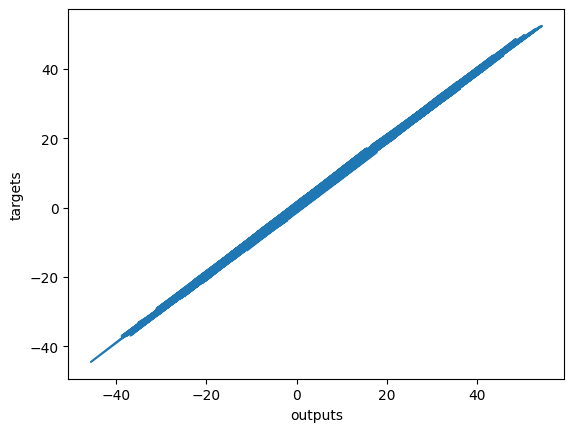

: 

In [ ]:
plt.plot(np.squeeze(model.predict_on_batch(training_data['inputs'])), np.squeeze(training_data['targets']))
plt.xlabel('outputs')
plt.ylabel('targets')
plt.show()